In [282]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import fcluster

In [283]:
# Load the dataset
df = pd.read_csv("Data_Analytics.csv")


In [284]:
data= df.copy()
# Selected features based on frequency and correlation analysis
features = ['exploitation', 'bad_contract', 'external_dependencies', 
            'buy_tax', 'sell_tax', 'slippage_modifiable', 'anti_whale_modifiable']
selected_features_df = data[features].replace({True:1, False:0})

In [285]:
distance_matrix = pdist(selected_features_df, 'jaccard')
distance_square_matrix = squareform(distance_matrix)  # Convert to square matrix

In [286]:
# Create linkage matrix
linkage_matrix = sch.linkage(distance_matrix, method='ward')

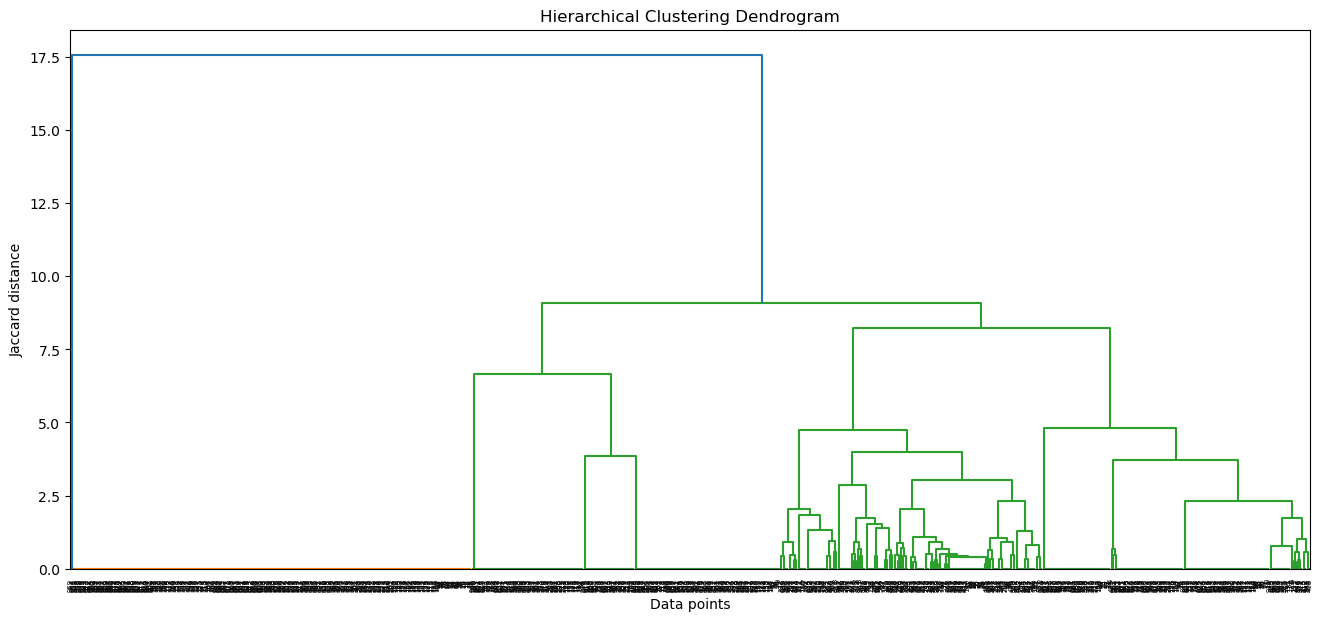

In [287]:
# Plot the dendrogram
plt.figure(figsize=(16, 7))
dendrogram = sch.dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Jaccard distance')
plt.show()

In [288]:
# Keep the feature names for column selection
selected_features = features

# Combine the selected features with 'cluster'
columns_to_select = selected_features + ['cluster']

# Add cluster labels back to your original DataFrame if not done already
data['cluster'] = cluster_labels  # Make sure cluster_labels is defined

# Select the columns and group by 'cluster'
cluster_summary = data[columns_to_select].groupby('cluster').agg(['mean', 'std', 'median', 'count'])

In [289]:
print(cluster_centers.dtypes)

exploitation             float64
bad_contract             float64
external_dependencies    float64
buy_tax                  float64
sell_tax                 float64
slippage_modifiable      float64
anti_whale_modifiable    float64
dtype: object


In [290]:
cluster_centers = cluster_centers.apply(pd.to_numeric, errors='coerce')


In [291]:
cluster_centers = cluster_centers.dropna()  # or use fillna() to replace NaNs


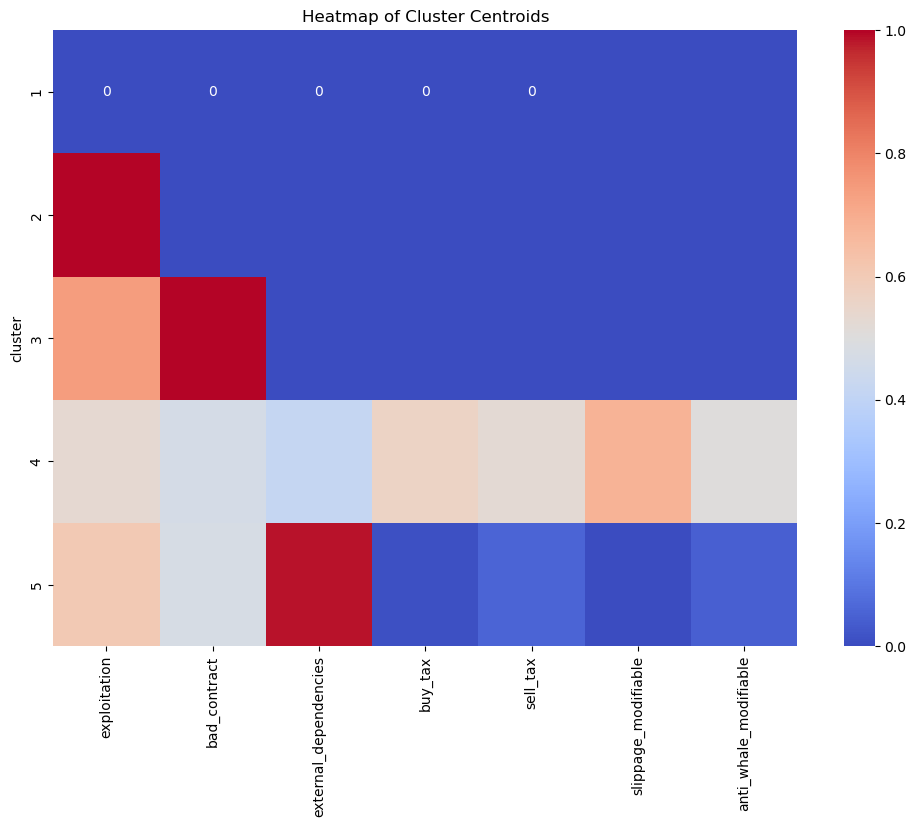

In [292]:
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_centers, annot=True, cmap='coolwarm')
plt.title('Heatmap of Cluster Centroids')
plt.show()
